In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel(r"Concrete_Data.xls")
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [9]:
# Y = data['Concrete compressive strength(MPa,megapascals)']
print(data.columns)


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [10]:
Y = data.iloc[:,8].values
Y_Matrix = Y.reshape((Y.size,1))
print(Y_Matrix)
Age = data.iloc[:,7].values
X_Matrix = data.iloc[:,7].values
# print(X_Matrix[0])
# plt.scatter(Age,Y)
# plt.show()
I = np.ones((Age.size,))
Age = np.vstack((I,Age)).T



def model_Age(Y,Age,learning_rate,iteration):
    
    m = Y.size
    theta = np.zeros((2,1))
    cost_list = []
    
    for i in range(iteration):
        
        y_predicted = np.dot(Age,theta)
        cost = (1/(2*m))*np.sum(np.square(y_predicted - Y))
        cost_list.append(cost)
        
        d_theta = (1/m)*np.dot(Age.T,y_predicted - Y)
        theta = theta - learning_rate*d_theta

      
    return theta,cost_list
    

[[79.98611076]
 [61.88736576]
 [40.26953526]
 ...
 [23.69660064]
 [32.76803638]
 [32.40123514]]


In [11]:
learning_rate = 0.00001
iteration = 100
theta,cost_list = model_Age(Y_Matrix,Age,learning_rate = learning_rate,iteration = iteration)
# print(np.dot([1,270],theta))
# rng = np.arange(0,iteration)
# plt.plot(cost_list,rng)
# plt.show
# Y_List = []
# for i in range(X_Matrix.size):
#     y = np.dot([1,X_Matrix[i]],theta)
#     Y_List.append(y)

# plt.plot(Y_List,X_Matrix)
# plt.show
    


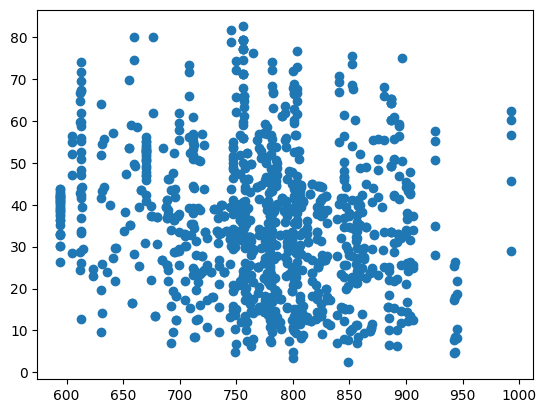

In [12]:
Y = data.iloc[:,8].values
# Y_Matrix = Y.reshape((Y.size,1))
Fine_aggregate = data.iloc[:,6].values
# I = np.ones((Fine_aggregate.size))
# Fine_aggregate = np.vstack((I,Fine_aggregate)).T

plt.scatter(Fine_aggregate,Y)
plt.show()

def model_fAggr(Y,Fine_Aggregate,learning_rate,iteration):
    m = Y.size
    theta = np.zeros((2,1))

    for i in range(iteration):
        y_predicted = np.dot(Fine_aggregate,theta)
        cost = (1/(2*m))*np.sum(np.square(y_predicted - Y))

        d_theta = (1/m)*np.dot(Fine_aggregate.T,y_predicted - Y)
        theta = theta - learning_rate*d_theta

    return theta

In [13]:
learning_rate = 0.000001
iteration = 100
theta = model_fAggr(Y_Matrix,Fine_aggregate,learning_rate = learning_rate, iteration = iteration)
print(np.dot([1,676],theta))

ValueError: shapes (1030,) and (2,1) not aligned: 1030 (dim 0) != 2 (dim 0)

In [ ]:
Course_aggregate = data.iloc[:,5]
plt.scatter(Course_aggregate,Y)
plt.show()

In [ ]:
plasticizer = data.iloc[:,4]
plt.scatter(plasticizer,Y)
plt.show()

In [ ]:
water = data.iloc[:,3]
plt.scatter(water,Y)
plt.show()

In [ ]:
flyAsh = data.iloc[:,2]
plt.scatter(flyAsh,Y)
plt.show()

In [ ]:
blast_Furnace = data.iloc[:,1]
plt.scatter(blast_Furnace,Y)
plt.show()

In [ ]:
cement = data.iloc[:,0]
Cement_List = []
for i in range(cement.size):
    y = np.dot([1,cement[i]],theta)
    Cement_List.append(y)

plt.plot(Cement_List,cement)
plt.show()